# Lab 3: Linear Regression

In this assignment, we will learn the Linear Regression model. 

First, please study the given example, which uses linear regression for the house price prediction task. In this example, you will learn how to preprocess data, how to train the model, and how to evaluate the model. 

Based on the given example and Lab Assignment 2, your task is to use the linear regression model to predict the medical cost for the dataset given in Lab Assignment 2. 

## 1. Example: Linear Regression for House Price Prediction

In this example, we use the house price dataset. It gives the attributes and price of each house. The task is to build a linear regression model to make prediction for the price of the house.

### 1.1 Preprocess the raw data

When given a new dataset, we need to deal with the missing values and categorical features. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder # cat data -> [0, 1, ..., n-1]
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler # z-score scaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt


df = pd.read_csv('housing.csv')

# 0. fill in missing values
mean_val = df['total_bedrooms'].mean()
df['total_bedrooms'] = df['total_bedrooms'].fillna(mean_val)
print(df.isnull().sum())

# 1. convert categorical features to numerical values
labelencoder = LabelEncoder()
df['ocean_proximity'] = labelencoder.fit_transform(df['ocean_proximity'])
print(df.info())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


### 1.2 Split the preprocessed dataset into training set and testing set

For the supervised learning, we need to split the dataset into the training set and test set. The training set is used to learn model parameters and the testing set is used to evaluate the learned model. 

Note that the testing set is NOT allowed to be used in the training phase. 

In [2]:
# 2. split samples
house_fea = df.drop('median_house_value', axis=1).values # drop returns a new df with labels dropped
house_price = df['median_house_value'].values # 'y'

# normalization?
house_price = house_price / np.max(house_price)

X_train,X_test,y_train,y_test = train_test_split(house_fea,
                                                 house_price,
                                                 test_size=0.2,
                                                 random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


# normalize features
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

(16512, 9)
(4128, 9)
(16512,)
(4128,)


### 1.3 Train the linear regression model 

$\min_{w}\frac{1}{n}\|y-X\mathbf{w}\|_2^2$



Here, we use the training set to learn the model parameter $\mathbf{w}=(w_0, w_1, w_2, \cdots, w_d)$. 

Then, we compute MAE, MSE, and RMSE to see how well the learned model fit the training set. 

In [3]:
#3. train the model
lr = LinearRegression()

lr.fit(X_train,y_train)

print("bias is "+str(lr.intercept_))
print("coefficients  is "+str(lr.coef_))

y_train_pred = lr.predict(X_train)

mae = mean_absolute_error(y_train_pred,y_train)
mse = mean_squared_error(y_train_pred,y_train)
rmse = np.sqrt(mse)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


bias is 0.41438855869860675
coefficients  is [-0.17170955 -0.18189176  0.02984855 -0.0353864   0.09753502 -0.08776816
  0.03520256  0.15428789 -0.00090304]
prediction for training set:
MAE is: 0.10125365457873205
MSE is: 0.0192437559440504
RMSE is: 0.13872186541439818


### 1.4 Evaluate the linear regression model

After obtaining the model parameter $\mathbf{w}=(w_0, w_1, w_2, \cdots, w_d)$, the linear regression model is determined. Then, we need to evaluate this model to see how well this model generaizes on the testing set. 

prediction for testing set:
MAE is: 0.10369354831097967
MSE is: 0.020220019584503236
RMSE is: 0.14219711524677017


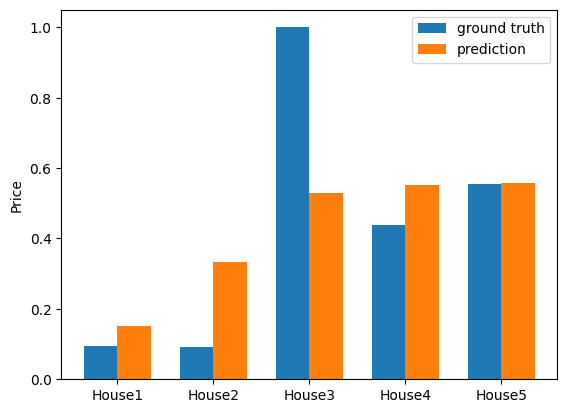

In [4]:
#4. evaluate the model
y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))

# the graph only compare first five houses in the regression (truth vs prediction)
labels = ['House1', 'House2', 'House3', 'House4', 'House5']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# subplot used to draw multiple bar charts on one chart
fig, ax = plt.subplots()

# numerically the x axis is irrelevant, its been changed to fit the graph
rects1 = ax.bar(x - width/2, y_test[0:5], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:5], width, label='prediction')

ax.set_ylabel('Price')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


## 2. Task: Linear Regression for Medical Cost Prediction

Following the given example, build a linear regression model for [the insurance dataset](./insurance.csv) to predict the medical cost.  


### 2.1 Preprocess the raw data

Based on your Lab Assignment 2, deal with the missing values and categorical features. 

In [5]:
from sklearn.preprocessing import OneHotEncoder

# load in dataset
insurance = pd.read_csv("./insurance.csv")

# check if any cell is NaN
has_missing_values = insurance.isnull().values.any()
print("The data has missing data:", has_missing_values)

categorical_features = insurance.select_dtypes(include=['object']).columns
numercial_features   = insurance.select_dtypes(exclude=['object']).columns

#!!! Preprocessing
Encoder = OneHotEncoder()

# One-hot-encode the data
Encoded = Encoder.fit(insurance[categorical_features])
transformed = Encoder.transform(insurance[categorical_features])
ohe_col_names = Encoded.get_feature_names_out()

# generate a dataframe from sparce matrix
encoded_DataFrame = pd.DataFrame.sparse.from_spmatrix(transformed, columns=ohe_col_names)

# drop and replace
insurance_OHE = pd.concat([insurance.drop(columns=categorical_features), encoded_DataFrame], axis=1)

# normalize numercial features
z_scaler = StandardScaler()
scaled = z_scaler.fit(insurance_OHE[numercial_features])
transformed = z_scaler.transform(insurance_OHE[numercial_features]) 
zscaled_col_names = z_scaler.get_feature_names_out()

# numpy to df
scaled_dataframe = pd.DataFrame(transformed, columns=zscaled_col_names)

# drop and replace
insurance_OHE_ZSCALED = pd.concat([scaled_dataframe, encoded_DataFrame], axis=1)

The data has missing data: False


### 2.2 Split the preprocessed dataset into training set and testing set

Use 80% of samples as the training set and 20% of samples as the testing set

In [10]:
# target column (values read from UNNORMALIZED (raw) data)
charges = insurance['charges'].values
feature_matrix =  insurance_OHE_ZSCALED.drop(columns=['charges']).values

print(feature_matrix.shape)

# create a 80:20 split on the data
TRAIN_PERCENT = .8
SEED = 50
X_train, X_test, Y_train, Y_test = train_test_split(feature_matrix, 
                                                    charges, 
                                                    train_size=TRAIN_PERCENT, 
                                                    random_state=SEED)

print("shape of training_x: ", X_train.shape)
print("shape of testing_x : ", X_test.shape)
print("shape of training_y: ", Y_train.shape)
print("shape of testing_y : ", Y_test.shape)

(1338, 11)
shape of training_x:  (1070, 11)
shape of testing_x :  (268, 11)
shape of training_y:  (1070,)
shape of testing_y :  (268,)


### 2.3 Train the linear regression model 

Use the Linear regression model to do prediction

$\min_{w}\frac{1}{n}\|y-X\mathbf{w}\|_2^2$

Please output the learned model parameter $\mathbf{w}$ and see how the learned model fit the training set. 

In [7]:
# train
insurance_lr = LinearRegression()
reg = insurance_lr.fit(X_train, Y_train);

Y_pred = insurance_lr.predict(X_train)

MAE = mean_absolute_error(Y_pred,Y_train);
MSE = mean_squared_error(Y_pred,Y_train);

info = f'''
bias is {str(reg.intercept_)}
coefficients are {str(reg.coef_)}

Error on Training Data:
MAE : {MAE}
MSE : {MSE}
RMSE: {np.sqrt(MSE)}
'''

print(info)


bias is 20119.349446301934
coefficients are [  3538.42874336   2048.37257438    511.8423896      42.96366011
    -42.96366011 -11768.4377337   11768.4377337     375.47763388
    424.31162509   -685.28202744   -114.50723154]

Error on Training Data:
MAE : 4197.729505724185
MSE : 37060086.19885744
RMSE: 6087.699581850064



### 2.4 Evaluate the linear regression model


Evaluate the learned model to see how well this model generaizes on the testing set. 

In [8]:
from sklearn.metrics import r2_score

Y_pred = insurance_lr.predict(X_test)

MAE = mean_absolute_error(Y_pred,Y_test);
MSE = mean_squared_error(Y_pred,Y_test);
r2 = r2_score(Y_pred,Y_test)

info = f'''
Random Seed={SEED}
bias is {str(lr.intercept_)}
coefficients are {str(lr.coef_)}

Errors on Testing Data:
MAE : {MAE}
MSE : {MSE}
RMSE: {np.sqrt(MSE)}

r2: {r2} (r^2 value)
'''

print(info) 


Random Seed=50
bias is 0.41438855869860675
coefficients are [-0.17170955 -0.18189176  0.02984855 -0.0353864   0.09753502 -0.08776816
  0.03520256  0.15428789 -0.00090304]

Errors on Testing Data:
MAE : 4008.5154836742763
MSE : 34742386.898058675
RMSE: 5894.267291025974

r2: 0.6833921162028804 (r^2 value)



### 2.5 Use the ridge regression model to do prediction

$\min_{w}\frac{1}{n}\|y-Xw\|_2^2 + \lambda \|w\|_2^2$

* 1.5.1 Compare its performance on the testing set with that of the standard linear regression model $\min_{w}\frac{1}{n}\|y-Xw\|_2^2$

* 1.5.2 Use different $\lambda$ to see how it affects the performance of the ridge regression  model on the testing set


In [9]:
from sklearn.linear_model import Ridge

lambdas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
best_lambda = (0, float('-inf'), None, 0)

# test all hyperparams
for alpha in lambdas:
    
    # train model
    reg = Ridge(alpha=alpha)
    reg.fit(X_train, Y_train)
    
    # run test portion
    Y_pred = reg.predict(X_test)
    
    # get accuracy score
    acc = r2_score(Y_test, Y_pred)
    
    # update lambda
    best_lambda = max(best_lambda, (alpha, acc, reg.coef_, reg.intercept_), key=lambda t: t[1])
    
# unpack values
best_hyperp, acc, coef, interp = best_lambda

print(f'Best lambda value = {best_hyperp} with acc = {acc}')
print(f'Bias: {interp}\nCoefficients are {coef}')
print("\nOverall improvement in r2", best_lambda[1] - r2)

Best lambda value = 0.001 with acc = 0.7832549120603669
Bias: 20119.328976252084
Coefficients are [  3538.42503293   2048.36924029    511.84285936     42.96139446
    -42.9613944  -11768.40343412  11768.40343353    375.47557492
    424.30855789   -685.2766904    -114.50744103]

Overall improvement in r2 0.09986279585748647
